2025-06-15 09:01:02.655268: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Matplotlib is building the font cache; this may take a moment.


11490434/11490434 [==============================] - 0s 0us/step


2025-06-15 09:01:12.621433: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-06-15 09:01:12.622761: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/10
422/422 - 24s - loss: 0.2435 - accuracy: 0.9287 - val_loss: 0.0641 - val_accuracy: 0.9828 - 24s/epoch - 58ms/step
Epoch 2/10
422/422 - 21s - loss: 0.0623 - accuracy: 0.9808 - val_loss: 0.0594 - val_accuracy: 0.9832 - 21s/epoch - 49ms/step
Epoch 3/10
422/422 - 26s - loss: 0.0448 - accuracy: 0.9865 - val_loss: 0.0397 - val_accuracy: 0.9905 - 26s/epoch - 61ms/step
Epoch 4/10
422/422 - 21s - loss: 0.0342 - accuracy: 0.9891 - val_loss: 0.0405 - val_accuracy: 0.9883 - 21s/epoch - 49ms/step
Epoch 5/10
422/422 - 26s - loss: 0.0272 - accuracy: 0.9913 - val_loss: 0.0437 - val_accuracy: 0.9870 - 26s/epoch - 62ms/step
Epoch 6/10
422/422 - 26s - loss: 0.0223 - accuracy: 0.9927 - val_loss: 0.0383 - val_accuracy: 0.9902 - 26s/epoch - 61ms/step
Epoch 7/10
422/422 - 21s - loss: 0.0183 - accuracy: 0.9946 - val_loss: 0.0371 - val_accuracy: 0.9902 - 21s/epoch - 49ms/step
Epoch 8/10
422/422 - 26s - loss: 0.0141 - accuracy: 0.9957 - val_loss: 0.0437 - val_accuracy: 0.9908 - 26s/epoch - 62ms/step


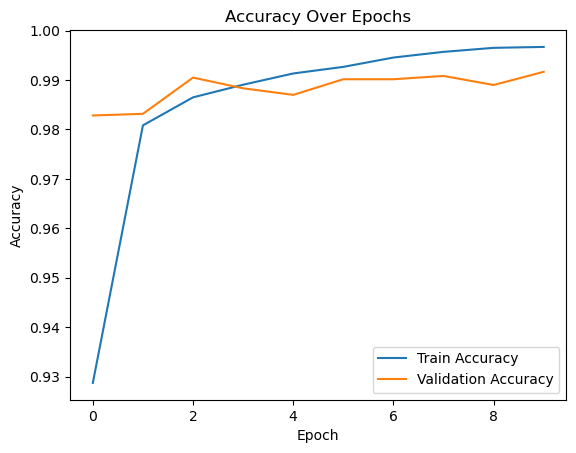

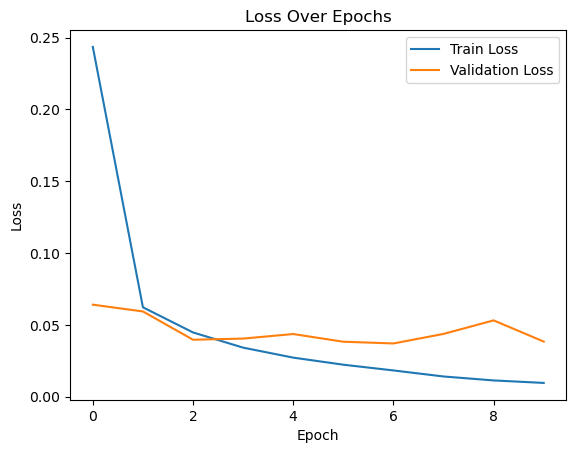

313/313 [==============================] - 1s 4ms/step - loss: 0.0340 - accuracy: 0.9894
Test Accuracy: 0.9894000291824341
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape images to add the channel dimension (grayscale = 1 channel)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Build the CNN model
model = tf.keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output classes for digits 0-9
])

# Compile the model with a customized learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0008)

model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model with a different batch size (128 instead of 64)
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=2
)

# Plot accuracy over epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss over epochs
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate model on test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)

# Print final model architecture
model.summary()

model.save("mnist_cnn_model.h5")

1/1 [==============================] - 0s 98ms/step


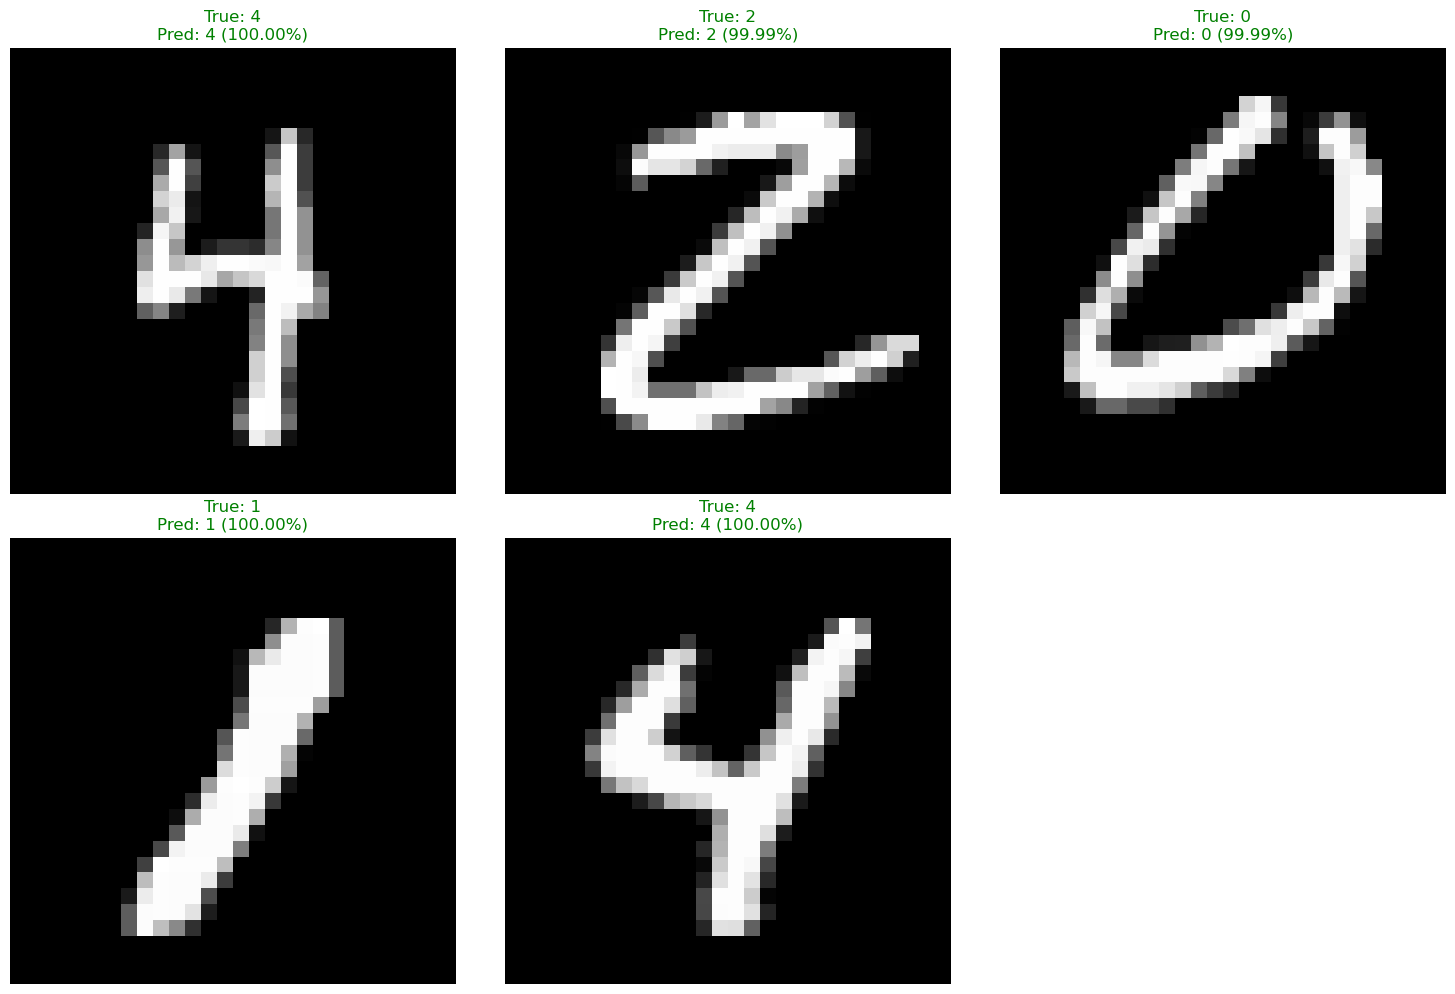

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.models import load_model
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
import seaborn as sns
import pandas as pd

# Load the trained model
model = load_model('mnist_cnn_model.h5')

# Load MNIST test data
(_, _), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize and reshape test data
x_test = x_test / 255.0
x_test = x_test.reshape(-1, 28, 28, 1)

def plot_predictions(images, true_labels, predictions, confidence_scores):
    plt.figure(figsize=(15, 10))
    for i in range(5):
        plt.subplot(2, 3, i+1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        pred_label = np.argmax(predictions[i])
        confidence = confidence_scores[i]
        color = 'green' if pred_label == true_labels[i] else 'red'
        plt.title(f'True: {true_labels[i]}\nPred: {pred_label} ({confidence:.2%})', color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Select 5 random indices
random_indices = random.sample(range(len(x_test)), 5)
sample_images = x_test[random_indices]
sample_labels = y_test[random_indices]

# Get predictions
predictions = model.predict(sample_images)
confidence_scores = np.max(predictions, axis=1)

# Plot results
plot_predictions(sample_images, sample_labels, predictions, confidence_scores)

def generate_heatmap(model, img_array, pred_index):
    # Get the last convolutional layer
    conv_layers = [layer for layer in model.layers if isinstance(layer, tf.keras.layers.Conv2D)]
    if not conv_layers:
        raise ValueError("No Conv2D layers found in the model.")
    last_conv_layer = conv_layers[-1]
    # print(f"Using the last Conv2D layer: {last_conv_layer.name}") # Optional: for debugging

    # Create a functional model that outputs both the last conv layer's output
    # and the final model's output.
    grad_model = tf.keras.models.Model(
        inputs=model.input,
        outputs=[last_conv_layer.output, model.output]
    )

    # Convert img_array to a TensorFlow Tensor and ensure it's float32
    # This is the crucial fix
    img_tensor = tf.convert_to_tensor(img_array, dtype=tf.float32)

    # Then, we compute the gradient of the top predicted class for our input image
    with tf.GradientTape() as tape:
        tape.watch(img_tensor) # Watch the input tensor for gradients
        conv_outputs, predictions = grad_model(img_tensor) # Pass the tensor to the model
        loss = predictions[:, pred_index]

    # Extract filters and gradients
    output = conv_outputs[0]
    grads = tape.gradient(loss, conv_outputs)[0]

    # Vector of mean intensity of the gradient over a specific feature map channel
    weights = tf.reduce_mean(grads, axis=(0, 1))

    # Create a heatmap
    heatmap = tf.reduce_sum(tf.multiply(weights, output), axis=-1)

    # Normalize the heatmap
    heatmap = tf.maximum(heatmap, 0) / (tf.math.reduce_max(heatmap) + 1e-8)
    heatmap = heatmap.numpy()

    # Resize heatmap to match original image size
    heatmap = cv2.resize(heatmap, (28, 28))

    return heatmap

def plot_heatmaps(images, predictions, heatmaps):
    plt.figure(figsize=(15, 10))
    for i in range(5):
        # Original image
        plt.subplot(2, 5, i+1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f'Pred: {np.argmax(predictions[i])}')
        plt.axis('off')

        # Heatmap
        plt.subplot(2, 5, i+6)
        plt.imshow(heatmaps[i], cmap='jet')
        plt.title('Heatmap')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
def generate_heatmap(model, img_array, pred_index):
    # Get the last convolutional layer
    conv_layers = [layer for layer in model.layers if isinstance(layer, tf.keras.layers.Conv2D)]
    if not conv_layers:
        raise ValueError("No Conv2D layers found in the model.")
    last_conv_layer = conv_layers[-1]
    # print(f"Using the last Conv2D layer: {last_conv_layer.name}") # Optional: for debugging

    # Create a functional model that outputs both the last conv layer's output
    # and the final model's output.
    grad_model = tf.keras.models.Model(
        inputs=model.input,
        outputs=[last_conv_layer.output, model.output]
    )

    # Convert img_array to a TensorFlow Tensor and ensure it's float32
    # This is the crucial fix
    img_tensor = tf.convert_to_tensor(img_array, dtype=tf.float32)

    # Then, we compute the gradient of the top predicted class for our input image
    with tf.GradientTape() as tape:
        tape.watch(img_tensor) # Watch the input tensor for gradients
        conv_outputs, predictions = grad_model(img_tensor) # Pass the tensor to the model
        loss = predictions[:, pred_index]

    # Extract filters and gradients
    output = conv_outputs[0]
    grads = tape.gradient(loss, conv_outputs)[0]

    # Vector of mean intensity of the gradient over a specific feature map channel
    weights = tf.reduce_mean(grads, axis=(0, 1))

    # Create a heatmap
    heatmap = tf.reduce_sum(tf.multiply(weights, output), axis=-1)

    # Normalize the heatmap
    heatmap = tf.maximum(heatmap, 0) / (tf.math.reduce_max(heatmap) + 1e-8)
    heatmap = heatmap.numpy()

    # Resize heatmap to match original image size
    heatmap = cv2.resize(heatmap, (28, 28))

    return heatmap


def plot_heatmaps(images, predictions, heatmaps):
    plt.figure(figsize=(15, 10))
    for i in range(5):
        # Original image
        plt.subplot(2, 5, i+1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f'Pred: {np.argmax(predictions[i])}')
        plt.axis('off')

        # Heatmap
        plt.subplot(2, 5, i+6)
        plt.imshow(heatmaps[i], cmap='jet')
        plt.title('Heatmap')
        plt.axis('off')
    plt.tight_layout()
    plt.show()